<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Описание

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

Импортируем необходимые модули и создадим функцию для изучения данных, выполним проверку на налицие дубликатов

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
ads_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#ads_df.head()
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
       # "Корреляция:", ads_df.corr(),
        #sns.heatmap(ads_df.corr())
    )
    

In [36]:
explore_data(ads_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

'Сводная информация:'

None

'10 строк:'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


'Столбцы:'

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

'Числовое описание:'

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


'Сумма пропусков:'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

'Доля пропусков:'

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

'Явные дубликаты:'

0

In [37]:
# Проверка на наличие неявных дубликатов в колонке 'locality_name'
#с помощью приведения к одному регистру  и замены ё на е и удалением лишних слов
#ads_df['locality_name'] = (ads_df['locality_name'])
    
low_locality_name_values = (ads_df['locality_name'].str.lower()
                           .str.replace('ё',"е")
                           .str.replace('городской ','')
                            .str.replace('коттеджный ', '')
                            .str.replace('городского типа ', '')
                            .str.replace('при железнодорожной станции ','')
                            .str.replace('станции ','')
                           .sort_values().unique())
                           
locality_name_values = ads_df['locality_name'].sort_values().unique()
if len(low_locality_name_values) != len(locality_name_values) :
    print(f"В колонке 'locality_name' было выявлено {len(locality_name_values) - len(low_locality_name_values)} неявных дубликата")
    ads_df['locality_name'] = (ads_df['locality_name'].str.lower()
                               .str.replace('ё',"е")
                               .str.replace('городской ','')
                               .str.replace('коттеджный ', '')
                               .str.replace('городского типа ', '')
                               .str.replace('при железнодорожной станции ','')
                               .str.replace('станции ',''))
else:
    print("Неявные дубликаты в колонке 'locality_name' отсутствуют")
    print(len(low_locality_name_values))
   

В колонке 'locality_name' было выявлено 46 неявных дубликата


In [38]:
ads_df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

### Вывод

**Необходимо скорректировать названия следующих столбцов:**

`parks_around3000` -> `parks_around_3000`
`ponds_around3000`  -> `ponds_around_3000` 
`cityCenters_nearest` -> `city_сenters_nearest`

**Изменить типы данных:**

`first_day_exposition`  перевести в дату

`floors_total, balcony, airports_nearest, city_сenters_nearest, parks_around_3000,	parks_nearest, ponds_around_3000, ponds_nearest, days_exposition` в целочисленный

`is_apartment`  в булевый, согласно описанию

**Выявлены пропуски в в столбцах:** 

`ceiling_height           9195
floors_total               86
living_area              1903
is_apartment            20924
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181`

**Явных дубликатов нет**

**В колонке `locality_name` выявлено 46 неявных дубликата**

## Предобработка данных

Переименуем столбцы, соторые не соответствуют стилю snake_case

In [39]:
ads_df = ads_df.rename(columns={'parks_around3000' : 'parks_around_3000',
                       'ponds_around3000' : 'ponds_around_3000',
                       'cityCenters_nearest' : 'city_сenters_nearest'})
print(ads_df.columns)


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Заполнение пропусков

В столбцах `balcony`, `parks_around_3000`, `ponds_around_3000` заменим пропущенные значения на 0, допуская, что причиной отсутствия данных является отсутствие объектов 
Доля пропусков в столбце `locality_name` всего 0.2%, заменим пропуски на `unknown`, чтобы в дальнейшем можно было произвести лемматизацию населенных пунков и разделить их на категории
¯ \ _ (ツ) _ / ¯ 

In [40]:
ads_df[['balcony', 'parks_around_3000', 'ponds_around_3000']] = (
    ads_df[['balcony', 'parks_around_3000', 'ponds_around_3000']].fillna(0)
)
ads_df['locality_name'] = ads_df['locality_name'].fillna('unknown')
#ads_df['ceiling_height'] = ads_df['ceiling_height'].fillna(ads_df['ceiling_height'].mean())


Логично, что чем выше потолки в квартирах, тем большие затраты несут застройщики, следовательно, цены на такие квартиры будут выше. Да и в целом квартиры с высокими потолками считаются более комфортными и престижными 💰💰💰 
Чтобы заполнить пропуски в столбце `ceiling_height` поступим следующим образом:
* создадим функцию, чтобы разделить квартиры в наборе на 4 ценовые категории с помощью квартилей
    * `эконом класс`
    * `комфорт класс`
    * `бизнес класс`
    * `премиум класс`
* создадим новый столбец `price_category` и применим эту фунцкцию к каждой строке набора с помощью метода `apply`
* сгруппируем данные по столбцу `price_category` 
* в каждой группе заполним пропуски медианным значением для этой категории

Аналогично поступим со столбцами `living_area`, `kitchen_area` ¯ \ _ (ツ) _ / ¯ 

In [41]:
def categorize_price(raw):
    quantilies = ads_df['last_price'].quantile([0.25,0.5,0.75])
    if raw['last_price'] < quantilies[0.25]:
        return 'эконом класс'
    if quantilies[0.25] <= raw['last_price'] < quantilies[0.5]:
        return 'комфорт класс'
    if quantilies[0.5] <= raw['last_price'] < quantilies[0.75]:
        return 'бизнес класс'
    if raw['last_price'] >= quantilies[0.75]:
        return 'премиум класс'
try:
    ads_df['price_category'] = ads_df.apply(categorize_price, axis=1) # применим функцию categorize_price к каждой строке набора
except:
    print('oooops something went wrong!!! ЪУЪ ')
    
ads_df[['ceiling_height', 'living_area', 'kitchen_area', 'days_exposition']] = (
    ads_df[['ceiling_height', 'living_area', 'kitchen_area', 'days_exposition']].
    fillna(ads_df.groupby(by='price_category')[['ceiling_height', 'living_area', 'kitchen_area', 'days_exposition']].
           transform('median')))
    
ads_df.head() #проверим


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,127.0,премиум класс
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.55,11.0,18.6,1,NaN,...,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,эконом класс
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,бизнес класс
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.90,14.0,48.8,9,NaN,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,премиум класс
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,премиум класс


Столбец `floors_total` содержит малую долю пропусков, меньше 0.004. Поэтому можно исключить строки с пропусками в данном столбце🦊

In [42]:
ads_df = ads_df.dropna(subset=['floors_total'])
ads_df.isna().mean()


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.882480
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.234278
city_сenters_nearest    0.233304
parks_around_3000       0.000000
parks_nearest           0.659298
ponds_around_3000       0.000000
ponds_nearest           0.616271
days_exposition         0.000000
price_category          0.000000
dtype: float64

Пропуски в столбцах `airports_nearest`, `city_сenters_nearest`, `parks_nearest`, `ponds_nearest` оставим незаполненными, т.к. в них содержатся географические данные, которые сложно восстановить без потери качества
Пропуски в столбце `is_apartment` также оставим без изменений, т.к. отличие апартаментов от квартиры заключается в юридическом статусе помещения 🤓🤓🤓

display(ads_df.groupby(by='price_category')['days_exposition'].mean())
def categorize_size(raw):
    quantilies = ads_df['total_area'].quantile([0.25,0.5,0.75])
    if raw['total_area'] < quantilies[0.25]:
        return 'маленькая'
    if quantilies[0.25] <= raw['total_area'] < quantilies[0.5]:
        return 'средняя'
    if quantilies[0.5] <= raw['total_area'] < quantilies[0.75]:
        return 'большая'
    if raw['total_area'] >= quantilies[0.75]:
        return 'дворец'
try:
    ads_df['total_area_category'] = ads_df.apply(categorize_size, axis=1) # применим функцию categorize_price к каждой строке набора
except:
    print('oooops something went wrong!!! ЪУЪ ')
display(ads_df.groupby(by='total_area_category')['days_exposition'].mean())

### Замена типа данных

колонки 'floors_total', 'balcony',  'parks_around_3000','ponds_around_3000', 'days_exposition' в 'Int64',т.к. эти данные не могут быть дробными
колонки 'ponds_nearest', 'parks_nearest', 'airports_nearest', 'city_сenters_nearest' в 'Int64', т.к
нет необходимости в сантиметрах до ближайшего парка 🦊
'first_day_exposition' переведем в формат даты         

In [43]:

column_to_round = {'floors_total' : 0,'balcony' : 0, 'airports_nearest' : 0, 'city_сenters_nearest' : 0,
                 'parks_around_3000' : 0, 'parks_nearest' : 0, 'ponds_around_3000' : 0,
                 'ponds_nearest' : 0, 'days_exposition' : 0}
colunms_to_change_type = {'floors_total' : 'Int64',
                          'balcony' : 'Int64', 'airports_nearest' : 'Int64',
                          'city_сenters_nearest' : 'Int64', 'parks_around_3000' : 'Int64',
                          'parks_nearest' : 'Int64', 'ponds_around_3000' : 'Int64',
                          'ponds_nearest' : 'Int64', 'days_exposition' : 'Int64'
                          }

ads_df = ads_df.round(column_to_round).astype(colunms_to_change_type)
ads_df['first_day_exposition'] = pd.to_datetime(ads_df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
ads_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0,санкт-петербург,18863,16028,1,482,2,755,127,премиум класс
1,7,3350000.0,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,...,2,поселок шушары,12817,18603,0,<NA>,0,<NA>,81,эконом класс
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,0,санкт-петербург,21741,13933,1,90,2,574,558,бизнес класс
3,0,64900000.0,159.0,2015-07-24,3,2.90,14,48.8,9,NaN,...,0,санкт-петербург,28098,6800,2,84,3,234,424,премиум класс
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,0,санкт-петербург,31856,8098,2,112,1,48,121,премиум класс


### Вывод

Итак, в этом разделе мы заполнили некоторые пропуски в данных; 
Заменили типы данных в столбцах:  
* `first_day_exposition`  перевели в дату
* `floors_total, balcony, airports_nearest, city_сenters_nearest, parks_around_3000,	parks_nearest, ponds_around_3000, ponds_nearest, days_exposition` в целочисленный, предварительно округлив значения с типом `float`

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра

In [44]:
ads_df['meter_price'] = ads_df['last_price'] / ads_df['total_area']
ads_df['meter_price'] = ads_df['meter_price'].round().astype('Int64')



Добавим в таблицу: день недели, месяц и год публикации объявления


In [45]:
ads_df['weekday_exposition'] = ads_df['first_day_exposition'].dt.day
ads_df['month_exposition'] = ads_df['first_day_exposition'].dt.month
ads_df['year_exposition'] = ads_df['first_day_exposition'].dt.year


Добавим в таблицу: этаж квартиры по категориям — первый, последний, другой


In [46]:
def categorize_floor(raw):
    if raw['floor'] == 1:
        return 1 #'первый'
    if (raw['floor'] == raw['floors_total']):
        return 2 #'последний'
    return 3 #'другой'
 
ads_df['floor_category'] = ads_df.apply(categorize_floor, axis=1)


Добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей


In [47]:
ads_df['living_area_to_total'] = ads_df['living_area'] / ads_df['total_area']
ads_df['kitchen_area_to_total'] = ads_df['kitchen_area'] / ads_df['total_area']
ads_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_category,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_to_total,kitchen_area_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755,127,премиум класс,120370,7,3,2019,3,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,...,<NA>,81,эконом класс,82921,4,12,2018,1,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,574,558,бизнес класс,92786,20,8,2015,3,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.90,14,48.8,9,NaN,...,234,424,премиум класс,408176,24,7,2015,3,0.306918,0.082390
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48,121,премиум класс,100000,19,6,2018,3,0.320000,0.410000


Добавим в таблицу стоимость квартир в миллионах, для удобства при построении графиков


In [48]:
ads_df['price_in_million'] = ads_df['last_price'] / 1000000

### Вывод

В этом разделе выполнили необходимые расчеты и добавили новые данные:
* стоимость квартир в миллионах, для удобства при построении графиков
* соотношение жилой и общей площади
* отношение площади кухни к общей
* этаж квартиры по категориям — первый, последний, другой
* день недели, месяц и год публикации объявления
* цену квадратного метра

## Исследовательский анализ данных

Напишем несколько функций для автоматизации действий
* `plot_hists` - строит гистограммы нужных колонок набора
* `count_moustache` - вычисляет границы Q1-IQR*1.5 и Q3+IQR*1.5
* `filter_data` - отсекает выбросы, которые не попадают в границы Q1-IQR*1.5 и Q3+IQR*1.5
* `explore_data` - управляющая функция для исследоваеия нужных колонок в наборе

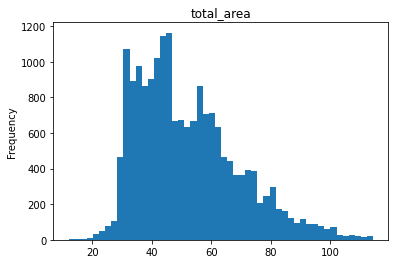

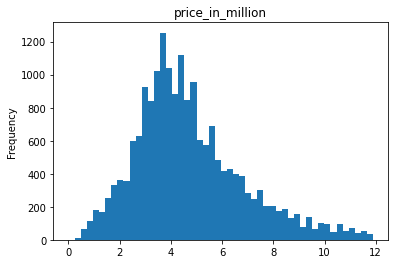

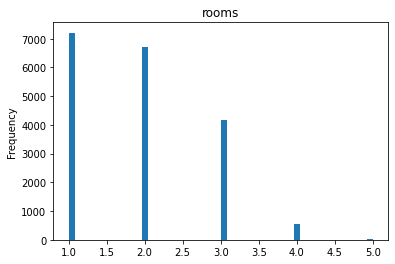

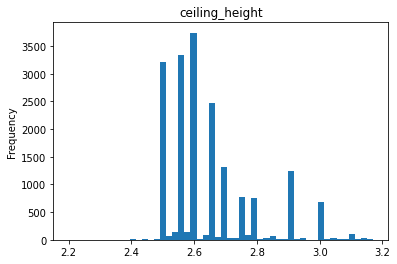

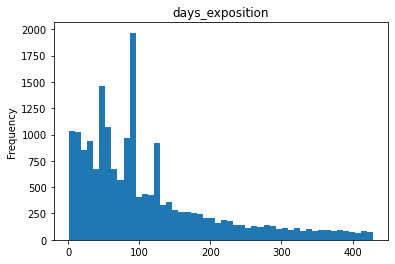

'Описание отфильтрованного набора'

,total_area,price_in_million,rooms,ceiling_height,days_exposition
count,18701.000000,18701.000000,18701.000000,18701.000000,18701.000000
mean,52.073794,4.728065,1.904497,2.645702,111.250307
std,17.063683,2.120158,0.859966,0.140837,96.207262
min,12.000000,0.012190,1.000000,2.200000,1.000000
25%,39.000000,3.300000,1.000000,2.550000,45.000000
50%,48.200000,4.350000,2.000000,2.600000,88.000000
75%,62.100000,5.800000,3.000000,2.700000,144.000000
max,114.300000,11.894400,5.000000,3.170000,429.000000


In [49]:

def plot_hists(columns,data):
    #number_of_bins = round(data.shape[0]/199)
    for column in columns:
        #print(column, '\n', data[column].value_counts())
        data[column].plot(title=column, kind='hist',bins=50)
        plt.show()

# вычисляем Q1-IQR*1.5 и Q3+IQR*1.5 для каждого столбца
def count_moustache(descr):
    res = {}
    for column in descr.columns:
        floor_outlier_tail = descr[column]['25%'] - (descr[column]['75%'] - descr[column]['25%']) * 1.5
        ceiling_outlier_tail = descr[column]['75%'] + (descr[column]['75%'] - descr[column]['25%']) * 1.5
        if floor_outlier_tail < 0: # ни одна из выбранных характеристик набора не может быть < 0
            floor_outlier_tail = 0 # поэтому Q1-IQR*1.5 установим в 0
        res[column] = (floor_outlier_tail, ceiling_outlier_tail)
    return res

# отфильтровываем выбросы
def filter_data(columns,moustache, data):
    filtered_data = data.copy()
    for column in columns:
        filtered_data = filtered_data[(filtered_data[column] > moustache[column][0]) &
                                      (filtered_data[column] < moustache[column][1])]
    #display(filtered_data)
    return  filtered_data  

def explore_data(eda_columns, data=ads_df):
    describe = data[eda_columns].describe()
    #display(data[eda_columns].corr())
    #display(sns.heatmap(data[eda_columns].corr()))
    moustache = count_moustache(describe) # усы для ящика каждого столбца
    #print(moustache)
    filtered_data = filter_data(eda_columns, moustache, data)
    #display(filtered_data.shape, ads_df.shape) # не испортил ли исходный набор
    plot_hists(eda_columns, filtered_data)
    display("Описание отфильтрованного набора", filtered_data[eda_columns].describe())
    return filtered_data

ads_filtered = explore_data(eda_columns=['total_area', 'price_in_million', 'rooms', 'ceiling_height', 'days_exposition'])    

основной диапазон площади 30-75
цена от 2 до 7 млн
большинство 1-2 комнатные
высота потолков 2.5-2.75 м
продажа до 150 дней
'total_area', 'price_in_million', 'rooms', 'ceiling_height', 'days_exposition' были очищены от выбросов, построены гистограммы

In [50]:
ads_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_category,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_to_total,kitchen_area_to_total,price_in_million
1,7,3350000.0,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,...,81,эконом класс,82921,4,12,2018,1,0.460396,0.272277,3.350
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,121,премиум класс,100000,19,6,2018,3,0.320000,0.410000,10.000
5,10,2890000.0,30.4,2018-09-10,1,2.55,12,14.4,5,NaN,...,55,эконом класс,95066,10,9,2018,3,0.473684,0.299342,2.890
6,6,3700000.0,37.3,2017-11-02,1,2.60,26,10.6,6,NaN,...,155,комфорт класс,99196,2,11,2017,3,0.284182,0.386059,3.700
7,5,7915000.0,71.6,2019-04-18,2,2.90,24,48.8,22,NaN,...,127,премиум класс,110545,18,4,2019,3,0.681564,0.263966,7.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.55,5,17.5,4,NaN,...,413,эконом класс,45000,7,7,2017,3,0.583333,0.200000,1.350
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.0,8,NaN,...,239,комфорт класс,73718,5,8,2016,3,0.641026,0.128205,4.600
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5,38.0,4,NaN,...,45,эконом класс,52542,15,1,2018,3,0.644068,0.144068,3.100
23696,18,2500000.0,56.7,2018-02-11,2,2.55,3,29.7,1,NaN,...,88,эконом класс,44092,11,2,2018,1,0.523810,0.128748,2.500


 Больше всего влияют на стоимость квартиры - площадь, количество комнат(логично,больше комнат - больше площадь), близость к центру. От даты размещения цена не зависит 

In [51]:
ads_filtered[['last_price', 'meter_price','total_area', 'rooms',
              'floor_category', 'city_сenters_nearest','weekday_exposition', 
              'weekday_exposition', 'year_exposition', ]].corr()['last_price']

last_price              1.000000
meter_price             0.643161
total_area              0.680095
rooms                   0.412421
floor_category          0.165305
city_сenters_nearest   -0.315508
weekday_exposition      0.000525
weekday_exposition      0.000525
year_exposition         0.035950
Name: last_price, dtype: float64

Выберем 10 населённых пунктов с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.  Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [52]:
#ads_filtered.groupby(by='locality_name')['rooms'].count().sort_values
top_ten_locations = ads_filtered['locality_name'].value_counts().head(10).index
top_ten_df = ads_filtered.query('locality_name in @top_ten_locations')
top_ten_df.groupby(by='locality_name')['meter_price'].mean().sort_values(ascending=False)

locality_name
санкт-петербург      105433.581928
пушкин               100108.077703
деревня кудрово       92386.890688
поселок парголово     90050.432886
поселок мурино        85322.917012
поселок шушары        78333.251256
колпино               75253.993485
гатчина               68849.272388
всеволожск             67227.54386
выборг                58071.015306
Name: meter_price, dtype: Float64

<AxesSubplot:xlabel='locality_name'>

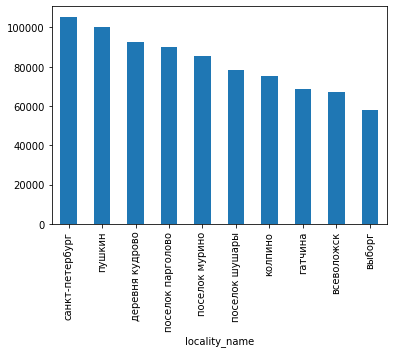

In [53]:
top_ten_df.groupby(by='locality_name')['meter_price'].mean().sort_values(ascending=False).plot.bar()

Выделим квартиры в Санкт-Петербурге. Посчитаем среднюю цену для каждого километра. Построим график  зависимости цены от удалённости от центра.

<AxesSubplot:xlabel='km_to_center'>

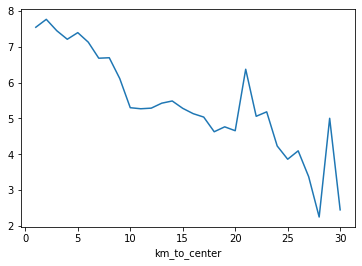

In [54]:

#ads_filtered['km_to_center'] = round(ads_filtered['city_сenters_nearest'] / 1000)
ads_filtered['km_to_center'] = np.ceil(ads_filtered['city_сenters_nearest'] / 1000)
peter_flats = ads_filtered[ads_filtered['locality_name'] == 'санкт-петербург'].copy()
#print(peter_flats['km_to_center'].mean(), peter_flats['km_to_center'].median())
peter_flats['km_to_center'] = peter_flats['km_to_center'].fillna(round(peter_flats['km_to_center'].median()))
peter_flats.groupby(by='km_to_center')['price_in_million'].mean().plot()
#peter_flats['km_to_center'].isna().value_counts()

кажется центр города в пределах 8 км, но это не точно 🤡

Выделим сегмент квартир в центре. 

,price_in_million,total_area,rooms,ceiling_height,km_to_center
price_in_million,1.000000,0.697377,0.442425,0.448765,-0.132530
total_area,0.697377,1.000000,0.797367,0.403823,-0.173375
rooms,0.442425,0.797367,1.000000,0.271358,-0.165283
ceiling_height,0.448765,0.403823,0.271358,1.000000,-0.213288
km_to_center,-0.132530,-0.173375,-0.165283,-0.213288,1.000000


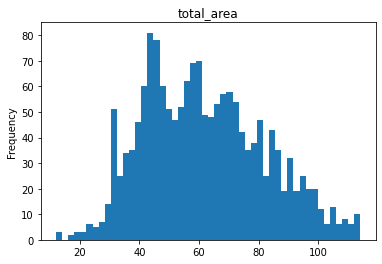

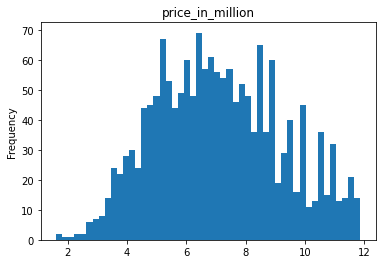

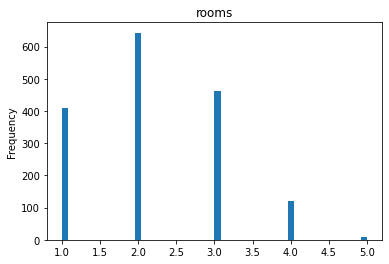

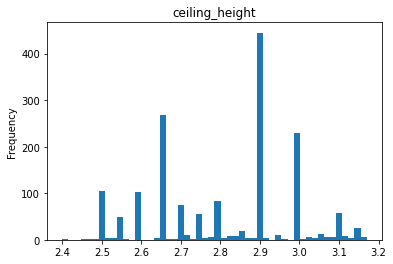

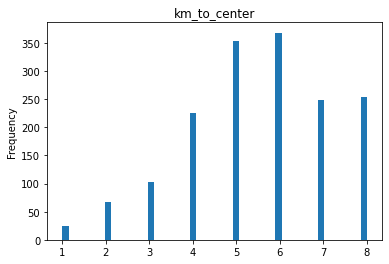

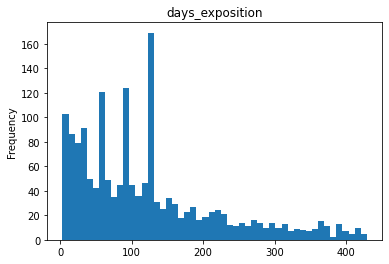

In [55]:
spb_center = peter_flats.query('km_to_center <= 8')
spb_other = peter_flats.query('km_to_center > 8')
display(spb_center[['price_in_million', 'total_area',  'rooms',
            'ceiling_height', 'km_to_center', 'first_day_exposition']].corr())

plot_hists(['total_area', 'price_in_million', 'rooms',
            'ceiling_height', 'km_to_center','days_exposition'], spb_center)

In [56]:


corr  = spb_center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
corr.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1.000000
1,price_in_million,1.000000
2,total_area,0.697377
3,living_area,0.568042
4,kitchen_area,0.455951
5,ceiling_height,0.448765
6,rooms,0.442425
7,meter_price,0.271674
8,floor_category,0.194252
9,floor,0.151016


### Вывод

* немного изменился основной диапазон площади 30-85
* увеличился основной диапазон цен, от 3 до 10 млн
* в центре преобладают 2х комнатные квартиры
* усилилась зависимость цены от высоты потолков
* в центре  более высокие потолки 2.9 м

## Общий вывод

Итак, провели исследование объявлений о продаже квартиры:

**были скорректированны названия столбцов в соответствии со стилем snake case :**

`parks_around3000` -> `parks_around_3000`
`ponds_around3000`  -> `ponds_around_3000` 
`cityCenters_nearest` -> `city_сenters_nearest`

**Изменны типы данных:**

`first_day_exposition`  переформатировали в дату

`floors_total, balcony, airports_nearest, city_сenters_nearest, parks_around_3000,	parks_nearest, ponds_around_3000, ponds_nearest, days_exposition` перевели в целочисленный тип

**Заполнили пропуски:**
В столбцах `balcony`, `parks_around_3000`, `ponds_around_3000` заменили пропущенные значения на 0, допустив, что причиной отсутствия данных было отсутствие объектов 
В столбце `locality_name` заменили пропуски на `unknown` ввиду, т.к количество пропусков достаточно мало
В столбцах `ceiling_height`, `living_area`, `kitchen_area`  заполнили пропуски медианным значением для каждой категории
из столбца `price_category`
Исключили из набора строки с пропусками в столбце `floors_total` ввиду малого количества
**В колонке `locality_name` было выявлено 46 неявных дубликата**

**В 3 разделе выполнили необходимые расчеты и добавили новые данные:**

    стоимость квартир в миллионах, для удобства при построении графиков
    соотношение жилой и общей площади
    отношение площади кухни к общей
    этаж квартиры по категориям — первый, последний, другой
    день недели, месяц и год публикации объявления
    цену квадратного метра

**В 4 пункте установили основные отличия недвижимости в центре Санкт-Петербурга**
* изменился основной диапазон площади 30-85
* увеличился основной диапазон цен, от 3 до 10 млн
* в центре преобладают 2х комнатные квартиры
* усилилась зависимость цены от высоты потолков
* в центре  более высокие потолки 2.9 м

Таким образом, установлено , что наибольшее влияние на стоимость квартиры оказывают площадь, количество комнат, близость к центру. От даты размещения цена не зависит
